## Regression Problem: House Prices Prediction
In this exercise, we will solve a regression problem with a neural network.

**Objective:** The goal is to predict the house selling prices .

**Dataset:**  A csv file with 1460 samples is provided (on the course webpage). Each example contains four input features. We will use 1000 examples as training set, 200 as validation set and the rest as test set.   
   * **Feature names**: OverallQual, YearBuilt, TotalBsmtSF, GrLivArea
   * **Target**: SalePrice

**NB:** new required libraries: `pandas`, `seaborn`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import seaborn as sns

%matplotlib inline

In [2]:
# Load data:
df = pd.read_csv("house_prices.csv")

In [3]:
df.head(3)

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,SalePrice
0,7,2003,856,1710,208500
1,6,1976,1262,1262,181500
2,7,2001,920,1786,223500


In [4]:
#normalisation
df=(df-df.mean())/df.std()

In [5]:
df.info() # get more information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OverallQual  1460 non-null   float64
 1   YearBuilt    1460 non-null   float64
 2   TotalBsmtSF  1460 non-null   float64
 3   GrLivArea    1460 non-null   float64
 4   SalePrice    1460 non-null   float64
dtypes: float64(5)
memory usage: 57.2 KB


### Data Analysis
Before training, we need first to analyze the dataset, to know its properties better.

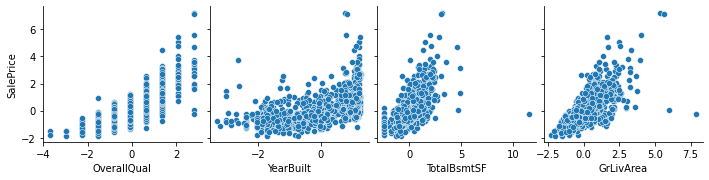

In [6]:
sns.pairplot(df, x_vars=['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea'], 
             y_vars=['SalePrice'])

### House prices prediction

Here is a skeleton of a neural network with a single layer (thus: a linear classifier). This is the model you'll start with and improve during this exercise.

Look at the code and run it to see its structure, then follow the questions below to iteratively improve the model.

In [65]:
X = df[['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea']] # get the four features from the dataframe
y = df['SalePrice'] # get the target values

In [66]:
X_train = X.iloc[:1000]
y_train = y.iloc[:1000]

X_val = X.iloc[1000:1200]
y_val = y.iloc[1000:1200]

X_test = X.iloc[1200:]
y_test = y.iloc[1200:]

In [67]:
# Construct a model with one layer
class Model_L1(nn.Module):
    
    def __init__(self):
        super(Model_L1, self).__init__()
        
        self.l1 = nn.Linear(4, 1)
        
    def forward(self, inputs):
        outputs = self.l1(inputs)
        return outputs

In [68]:
# Construct a model with one layer
class Model_L2(nn.Module):
    
    def __init__(self, k):
        super(Model_L2, self).__init__()
        
        self.l1 = nn.Linear(4, k)
        self.l2 = nn.Linear(k, 1)
        
    def forward(self, inputs):
        x = self.l1(inputs)
        x = torch.relu(x) # You can put anything, as long as its Pytorch functions
        x = torch.flatten(x, start_dim=1)
        outputs = self.l2(x)
        return outputs
    
class Model_L3(nn.Module):
    
    def __init__(self, k, l):
        super(Model_L3, self).__init__()
        
        self.l1 = nn.Linear(4, k)
        self.l2 = nn.Linear(k, l)
        self.l3 = nn.Linear(l, 1)
        
    def forward(self, inputs):
        x = self.l1(inputs)
        x = torch.relu(x) # You can put anything, as long as its Pytorch functions
        x = torch.flatten(x, start_dim=1)
        x = self.l2(x)
        x = torch.relu(x) # You can put anything, as long as its Pytorch functions
        x = torch.flatten(x, start_dim=1)
        outputs = self.l3(x)
        return outputs

In [69]:
# Choose the hyperparameters for training: 
num_epochs = 25
batch_size = 10

# Training criterion. This one is a mean squared error (MSE) loss between the output
# of the network and the target label
criterion = nn.MSELoss()

# Use SGD optimizer with a learning rate of 0.01
# It is initialized on our model

In [70]:
train_set = TensorDataset(torch.from_numpy(np.array(X_train)).float(), 
                          torch.from_numpy(np.array(y_train)).float()) # creat the dataset.

In [71]:
val_set = TensorDataset(torch.from_numpy(np.array(X_val)).float(), 
                          torch.from_numpy(np.array(y_val)).float()) # creat the dataset.

In [72]:
test_set = TensorDataset(torch.from_numpy(np.array(X_test)).float(), 
                          torch.from_numpy(np.array(y_test)).float()) # creat the dataset.

In [73]:
def train(num_epochs, batch_size, criterion, optimizer, model, dataset):
    dataloader = DataLoader(dataset, batch_size, shuffle=True)

    model.train()
    list_loss = []
    for epoch in range(num_epochs):
        epoch_average_loss = 0.0
        for (X, y) in (dataloader):
            y_pre = model(X).view(-1)
            loss = criterion(y_pre, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            epoch_average_loss += loss.item() * batch_size / len(train_set)
        list_loss.append(epoch_average_loss)
        if ((epoch+1)%1 == 0):
                print('Epoch [{}/{}], Loss_error: {:.4f}'
                      .format(epoch+1, num_epochs,  epoch_average_loss))
    
    return list_loss

Epoch [1/25], Loss_error: 0.6454
Epoch [2/25], Loss_error: 0.2297
Epoch [3/25], Loss_error: 0.2230
Epoch [4/25], Loss_error: 0.2207
Epoch [5/25], Loss_error: 0.2203
Epoch [6/25], Loss_error: 0.2211
Epoch [7/25], Loss_error: 0.2184
Epoch [8/25], Loss_error: 0.2194
Epoch [9/25], Loss_error: 0.2170
Epoch [10/25], Loss_error: 0.2192
Epoch [11/25], Loss_error: 0.2214
Epoch [12/25], Loss_error: 0.2191
Epoch [13/25], Loss_error: 0.2195
Epoch [14/25], Loss_error: 0.2184
Epoch [15/25], Loss_error: 0.2206
Epoch [16/25], Loss_error: 0.2180
Epoch [17/25], Loss_error: 0.2207
Epoch [18/25], Loss_error: 0.2198
Epoch [19/25], Loss_error: 0.2182
Epoch [20/25], Loss_error: 0.2218
Epoch [21/25], Loss_error: 0.2201
Epoch [22/25], Loss_error: 0.2193
Epoch [23/25], Loss_error: 0.2187
Epoch [24/25], Loss_error: 0.2195
Epoch [25/25], Loss_error: 0.2197
Epoch [1/25], Loss_error: 0.4695
Epoch [2/25], Loss_error: 0.2587
Epoch [3/25], Loss_error: 0.2402
Epoch [4/25], Loss_error: 0.2355
Epoch [5/25], Loss_error: 0

Epoch [21/25], Loss_error: 0.1793
Epoch [22/25], Loss_error: 0.1756
Epoch [23/25], Loss_error: 0.1735
Epoch [24/25], Loss_error: 0.1793
Epoch [25/25], Loss_error: 0.1758
Epoch [1/25], Loss_error: 1.0882
Epoch [2/25], Loss_error: 1.0238
Epoch [3/25], Loss_error: 1.0220
Epoch [4/25], Loss_error: 1.0221
Epoch [5/25], Loss_error: 1.0222
Epoch [6/25], Loss_error: 1.0230
Epoch [7/25], Loss_error: 1.0216
Epoch [8/25], Loss_error: 1.0217
Epoch [9/25], Loss_error: 1.0225
Epoch [10/25], Loss_error: 1.0227
Epoch [11/25], Loss_error: 1.0215
Epoch [12/25], Loss_error: 1.0215
Epoch [13/25], Loss_error: 1.0222
Epoch [14/25], Loss_error: 1.0220
Epoch [15/25], Loss_error: 1.0224
Epoch [16/25], Loss_error: 1.0222
Epoch [17/25], Loss_error: 1.0224
Epoch [18/25], Loss_error: 1.0221
Epoch [19/25], Loss_error: 1.0221
Epoch [20/25], Loss_error: 1.0215
Epoch [21/25], Loss_error: 1.0224
Epoch [22/25], Loss_error: 1.0222
Epoch [23/25], Loss_error: 1.0219
Epoch [24/25], Loss_error: 1.0216
Epoch [25/25], Loss_err

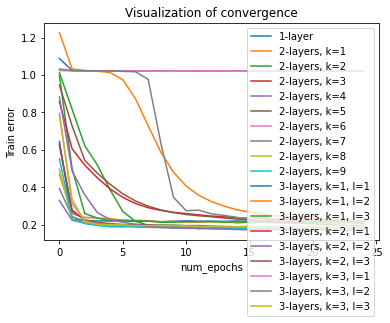

In [74]:
model = Model_L1()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
list_loss = train(num_epochs, batch_size, criterion, optimizer, model, train_set)
plt.plot(range(num_epochs), list_loss, label="1-layer")

for k in range(1, 10):
    model = Model_L2(k)
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
    list_loss = train(num_epochs, batch_size, criterion, optimizer, model, train_set)
    plt.plot(range(num_epochs), list_loss, label=f"2-layers, k={k}")

for k in range(1, 4):
    for l in range(1, 4):
        model = Model_L3(k ,l)
        optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
        list_loss = train(num_epochs, batch_size, criterion, optimizer, model, train_set)
        plt.plot(range(num_epochs), list_loss, label=f"3-layers, k={k}, l={l}")

plt.legend()
plt.xlabel("num_epochs")
plt.ylabel("Train error")
plt.title("Visualization of convergence")
plt.show()

In [82]:
class Model_L3_relu(nn.Module):
    
    def __init__(self):
        super(Model_L3_relu, self).__init__()
        
        self.l1 = nn.Linear(4, 2)
        self.l2 = nn.Linear(2, 2)
        self.l3 = nn.Linear(2, 1)
        
    def forward(self, inputs):
        x = self.l1(inputs)
        x = torch.relu(x) # You can put anything, as long as its Pytorch functions
        x = torch.flatten(x, start_dim=1)
        x = self.l2(x)
        x = torch.relu(x) # You can put anything, as long as its Pytorch functions
        x = torch.flatten(x, start_dim=1)
        outputs = self.l3(x)
        return outputs

class Model_L3_tanh(nn.Module):
    
    def __init__(self):
        super(Model_L3_tanh, self).__init__()
        
        self.l1 = nn.Linear(4, 2)
        self.l2 = nn.Linear(2, 2)
        self.l3 = nn.Linear(2, 1)
        
    def forward(self, inputs):
        x = self.l1(inputs)
        x = torch.tanh(x) # You can put anything, as long as its Pytorch functions
        x = torch.flatten(x, start_dim=1)
        x = self.l2(x)
        x = torch.tanh(x) # You can put anything, as long as its Pytorch functions
        x = torch.flatten(x, start_dim=1)
        outputs = self.l3(x)
        return outputs
    
class Model_L3_sig(nn.Module):
    
    def __init__(self):
        super(Model_L3_sig, self).__init__()
        
        self.l1 = nn.Linear(4, 2)
        self.l2 = nn.Linear(2, 2)
        self.l3 = nn.Linear(2, 1)
        
    def forward(self, inputs):
        x = self.l1(inputs)
        x = torch.sigmoid(x) # You can put anything, as long as its Pytorch functions
        x = torch.flatten(x, start_dim=1)
        x = self.l2(x)
        x = torch.sigmoid(x) # You can put anything, as long as its Pytorch functions
        x = torch.flatten(x, start_dim=1)
        outputs = self.l3(x)
        return outputs

Epoch [1/25], Loss_error: 1.3083
Epoch [2/25], Loss_error: 1.3362
Epoch [3/25], Loss_error: 1.2796
Epoch [4/25], Loss_error: 1.3760
Epoch [5/25], Loss_error: 1.2558
Epoch [6/25], Loss_error: 1.2909
Epoch [7/25], Loss_error: 1.2571
Epoch [8/25], Loss_error: 1.2787
Epoch [9/25], Loss_error: 1.1740
Epoch [10/25], Loss_error: 1.2043
Epoch [11/25], Loss_error: 1.1485
Epoch [12/25], Loss_error: 1.2036
Epoch [13/25], Loss_error: 1.1810
Epoch [14/25], Loss_error: 1.2241
Epoch [15/25], Loss_error: 1.1678
Epoch [16/25], Loss_error: 1.2528
Epoch [17/25], Loss_error: 1.1440
Epoch [18/25], Loss_error: 1.2610
Epoch [19/25], Loss_error: 1.2040
Epoch [20/25], Loss_error: 1.2300
Epoch [21/25], Loss_error: 1.2193
Epoch [22/25], Loss_error: 1.1839
Epoch [23/25], Loss_error: 1.1487
Epoch [24/25], Loss_error: 1.1099
Epoch [25/25], Loss_error: 1.1520
Epoch [1/25], Loss_error: 1.8491
Epoch [2/25], Loss_error: 1.7020
Epoch [3/25], Loss_error: 1.6475
Epoch [4/25], Loss_error: 1.4985
Epoch [5/25], Loss_error: 1

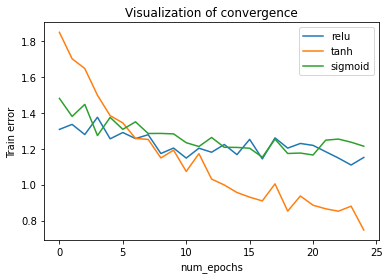

In [83]:
model = Model_L3_relu()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
list_loss = train(num_epochs, batch_size, criterion, optimizer, model, train_set)
plt.plot(range(num_epochs), list_loss, label="relu")

model = Model_L3_tanh()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
list_loss = train(num_epochs, batch_size, criterion, optimizer, model, train_set)
plt.plot(range(num_epochs), list_loss, label="tanh")

model = Model_L3_sig()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
list_loss = train(num_epochs, batch_size, criterion, optimizer, model, train_set)
plt.plot(range(num_epochs), list_loss, label="sigmoid")

plt.legend()
plt.xlabel("num_epochs")
plt.ylabel("Train error")
plt.title("Visualization of convergence")
plt.show()

range(10, 411, 50)
Epoch [1/25], Loss_error: 0.5576
Epoch [2/25], Loss_error: 0.3434
Epoch [3/25], Loss_error: 0.2933
Epoch [4/25], Loss_error: 0.2647
Epoch [5/25], Loss_error: 0.2461
Epoch [6/25], Loss_error: 0.2323
Epoch [7/25], Loss_error: 0.2209
Epoch [8/25], Loss_error: 0.2140
Epoch [9/25], Loss_error: 0.2074
Epoch [10/25], Loss_error: 0.2022
Epoch [11/25], Loss_error: 0.1972
Epoch [12/25], Loss_error: 0.1948
Epoch [13/25], Loss_error: 0.1922
Epoch [14/25], Loss_error: 0.1915
Epoch [15/25], Loss_error: 0.1879
Epoch [16/25], Loss_error: 0.1858
Epoch [17/25], Loss_error: 0.1855
Epoch [18/25], Loss_error: 0.1837
Epoch [19/25], Loss_error: 0.1838
Epoch [20/25], Loss_error: 0.1816
Epoch [21/25], Loss_error: 0.1806
Epoch [22/25], Loss_error: 0.1801
Epoch [23/25], Loss_error: 0.1788
Epoch [24/25], Loss_error: 0.1795
Epoch [25/25], Loss_error: 0.1769
Epoch [1/25], Loss_error: 1.4344
Epoch [2/25], Loss_error: 1.0536
Epoch [3/25], Loss_error: 0.8614
Epoch [4/25], Loss_error: 0.7251
Epoch [5

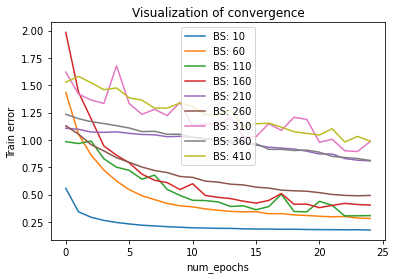

In [84]:
batch_sizes = range(10, 411, 50)
print(batch_sizes)

for batch_size in batch_sizes:
    model = Model_L3_tanh()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
    list_loss = train(num_epochs, batch_size, criterion, optimizer, model, train_set)
    plt.plot(range(num_epochs), list_loss, label=f"BS: {batch_size}")
    
plt.legend()
plt.xlabel("num_epochs")
plt.ylabel("Train error")
plt.title("Visualization of convergence")
plt.show()

[0.001, 0.01, 0.1, 1.0, 10.0]
Epoch [1/25], Loss_error: 1.2538
Epoch [2/25], Loss_error: 1.1701
Epoch [3/25], Loss_error: 1.1849
Epoch [4/25], Loss_error: 1.1313
Epoch [5/25], Loss_error: 1.2233
Epoch [6/25], Loss_error: 1.1638
Epoch [7/25], Loss_error: 1.1919
Epoch [8/25], Loss_error: 1.2272
Epoch [9/25], Loss_error: 1.2308
Epoch [10/25], Loss_error: 1.1251
Epoch [11/25], Loss_error: 1.1752
Epoch [12/25], Loss_error: 1.2275
Epoch [13/25], Loss_error: 1.2157
Epoch [14/25], Loss_error: 1.1869
Epoch [15/25], Loss_error: 1.1337
Epoch [16/25], Loss_error: 1.2081
Epoch [17/25], Loss_error: 1.2347
Epoch [18/25], Loss_error: 1.2170
Epoch [19/25], Loss_error: 1.2294
Epoch [20/25], Loss_error: 1.1160
Epoch [21/25], Loss_error: 1.1575
Epoch [22/25], Loss_error: 1.1933
Epoch [23/25], Loss_error: 1.1393
Epoch [24/25], Loss_error: 1.1440
Epoch [25/25], Loss_error: 1.1177
Epoch [1/25], Loss_error: 1.1207
Epoch [2/25], Loss_error: 1.1564
Epoch [3/25], Loss_error: 1.1094
Epoch [4/25], Loss_error: 1.13

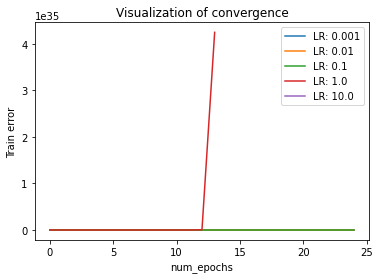

In [78]:
learning_rates = list(np.logspace(-3.0, 1.0, num=5))
print(learning_rates)

model = Model_L3_tanh()
for lr in learning_rates:
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    list_loss = train(num_epochs, batch_size, criterion, optimizer, model, train_set)
    plt.plot(range(num_epochs), list_loss, label=f"LR: {lr}")
    
plt.legend()
plt.xlabel("num_epochs")
plt.ylabel("Train error")
plt.title("Visualization of convergence")
plt.show()

Epoch [1/25], Loss_error: 1.5698
Epoch [2/25], Loss_error: 1.5393
Epoch [3/25], Loss_error: 1.4062
Epoch [4/25], Loss_error: 1.3664
Epoch [5/25], Loss_error: 1.3570
Epoch [6/25], Loss_error: 1.2935
Epoch [7/25], Loss_error: 1.2810
Epoch [8/25], Loss_error: 1.2465
Epoch [9/25], Loss_error: 1.2929
Epoch [10/25], Loss_error: 1.2336
Epoch [11/25], Loss_error: 1.1380
Epoch [12/25], Loss_error: 1.1758
Epoch [13/25], Loss_error: 1.1444
Epoch [14/25], Loss_error: 1.1127
Epoch [15/25], Loss_error: 1.0772
Epoch [16/25], Loss_error: 1.0874
Epoch [17/25], Loss_error: 1.0510
Epoch [18/25], Loss_error: 1.1104
Epoch [19/25], Loss_error: 1.0367
Epoch [20/25], Loss_error: 1.0449
Epoch [21/25], Loss_error: 1.0127
Epoch [22/25], Loss_error: 0.9370
Epoch [23/25], Loss_error: 0.9661
Epoch [24/25], Loss_error: 0.9943
Epoch [25/25], Loss_error: 0.9203
Epoch [1/25], Loss_error: 1.3701
Epoch [2/25], Loss_error: 1.2317
Epoch [3/25], Loss_error: 1.0315
Epoch [4/25], Loss_error: 0.9240
Epoch [5/25], Loss_error: 0

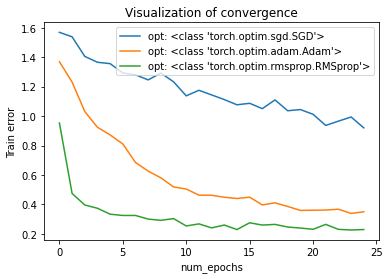

In [85]:
#optimizer
for opt in [torch.optim.SGD, torch.optim.Adam, torch.optim.RMSprop]:
    model = Model_L3_tanh()
    optimizer = opt(model.parameters(), lr=0.01)
    list_loss = train(num_epochs, batch_size, criterion, optimizer, model, train_set)
    plt.plot(range(num_epochs), list_loss, label=f"opt: {opt}")
    
plt.legend()
plt.xlabel("num_epochs")
plt.ylabel("Train error")
plt.title("Visualization of convergence")
plt.show()

In [ ]:
#loss function
#optimizer
for crit in [nn.MSELoss, torch.optim.Adam, torch.optim.RMSprop]:
    model = Model_L3_tanh()
    criterion = crit()
    optimizer = opt(model.parameters(), lr=0.01)
    list_loss = train(num_epochs, batch_size, criterion, optimizer, model, train_set)
    plt.plot(range(num_epochs), list_loss, label=f"crit: {crit}")
    
plt.legend()
plt.xlabel("num_epochs")
plt.ylabel("Train error")
plt.title("Visualization of convergence")
plt.show()

#### Evaluate the Model on the validation set

In [86]:
# Calculate mean squared error on validation set
model.eval()
with torch.no_grad():
    y_pre_val = model(torch.from_numpy(np.array(X_val)).float()).view(-1)
error = criterion(y_pre_val, torch.tensor(np.array(y_val)).float()).item()
print('The loss on validation set is:', error)

The loss on validation set is: 0.2858036756515503


In [87]:
model.eval()
with torch.no_grad():
    y_pre_val = model(torch.from_numpy(np.array(X_test)).float()).view(-1)
error = criterion(y_pre_val, torch.tensor(np.array(y_test)).float()).item()
print('The loss on validation set is:', error)

The loss on validation set is: 0.1740553081035614


### Exercise 1: Impact of the architecture of the model

The class `Model` is the definition of your model. You can now modify it to try out different architectures and
see the impact of the following factors:

* Try to add more layers (1, 2, 3, more ?)
* Try different activation functions ([sigmoid](https://pytorch.org/docs/stable/nn.functional.html#torch.nn.functional.sigmoid), [tanh](https://pytorch.org/docs/stable/nn.functional.html#torch.nn.functional.tanh), [relu](https://pytorch.org/docs/stable/nn.functional.html#torch.nn.functional.relu), etc.)
* Try to change the number of neurons in each layer (5, 10, 20, more ?)

### Exercise 2: Impact of the optimizer

Retrain the model with different parameters of the optimizer; you can change then in the cell initializing the optimizer, after the definition of your model.

* Use different batch sizes, from 10 to 400 e.g.
* Try different values of the learning rate (between 0.001 and 10), and see how they impact the training process. Do all network architectures react the same way to different learning rates?
* Change the duration of the training by increasing the number of epochs
* Try other optimizers, such as [Adam](https://pytorch.org/docs/stable/optim.html?highlight=adam#torch.optim.Adam) or [RMSprop](https://pytorch.org/docs/stable/optim.html?highlight=rmsprop#torch.optim.RMSprop)

**Note:** These changes may interact with your previous choices of architectures, and you may need to change them as well!

### Exercise 3: Impact of the loss function
As mensioned before in the first problem (binary classification), one can minimize the negative of log-likelihood of the probability for all samples $x$: $$ \sum_{(x,y) \,\in\, \text{Dataset}} - \log p(y | x) $$ If we define $p(y_i | x_i) = \frac{1}{\sqrt{2\pi}}e^{-\frac{(y_i - f(x_i))^2}{2}}$, then the loss function becomes the mean squared error. 

There is another loss function worth to try: the Gaussian likelihood loss function. 
Rather than predicting a single value $y$ given $x$, we predict a probability distribution over possible answers, which helps dealing with ambiguous cases and expressing uncertainty. To do this, for each possible input $x$, the network will output the parameters of the distribution modeling $p(y|x)$. For instance in our case, we choose to model output distributions with Gaussian distributions $\mathcal{N}(\mu, \sigma)$, which are parameterized by their mean $\mu$ and their standard deviation $\sigma$. Therefore for each input $x$ we have to output two quantities: $\mu(x)$ and $\sigma(x)$. The probability becomes: $$p(y_i | x_i) = \frac{1}{\sqrt{2\pi \sigma(x_i)^2}}e^{-\frac{(y_i - \mu(x_i))^2}{2\sigma(x_i)^2}}$$ Then the loss function becomes: $$L =\sum\limits_{i=1}^{N}  \frac{1}{2} \log ( 2\pi\sigma_i^{2} ) + \frac{1}{2\sigma_i^{2}}  (y_{i} - \mu_i)^{2}$$ If we set $\sigma=1$, we obtain MSE the loss function. 

* Try to replace the loss function with this one, and compare the differences between the two losses.
 
* **Hints**: 
    * You need two outputs of your network, one represents the $\mu(x_i)$, another for $\log( \sigma(x_i)^2 )$ (better for optimization) 
    * Try deeper models, or you will not predict the variance $\sigma$ well. 


### Exercice 4: Prediction on test set

* Once you have a model that seems satisfying on the validation dataset, you SHOULD evaluate it on a test dataset that has never been used before, to obtain a final accuracy value.
* When using the Gaussian likelihood function, the confidence of the network in its prediction is reflected in the variance it outputs. It can be interesting to check how this uncertainty varies with the data. For example, the uncertainty will decrease when the feature `OverallQual` increases. Plot the variance $\sigma(x)$ w.r.t one of the three features, on test set, and describe what you observe.

In [43]:
class Best_Model(nn.Module):
    
    def __init__(self):
        super(Best_Model, self).__init__()
        
        self.l1 = nn.Linear(4, 9)
        self.l2 = nn.Linear(9, 1)
        
    def forward(self, inputs):
        x = self.l1(inputs)
        x = torch.tanh(x) # You can put anything, as long as its Pytorch functions
        x = torch.flatten(x, start_dim=1)
        outputs = self.l2(x)
        return outputs

In [61]:
def RMSE(dataset, model):
    y_pred=[]
    y_test=[]
    with torch.no_grad():
        correct = 0
        total = 0
        dataloader = DataLoader(dataset)
        for images, labels in dataloader:
            #images = images.view(-1, 16*16)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            predicted = predicted.numpy()
            labels = labels.numpy()
            y_pred.append(predicted)
            y_test.append(labels)
    y_test = np.array(y_test)
    y_pred = np.array(y_pred)
    print(y_test)
    print(y_pred)
    res = np.sqrt(np.mean((y_pred - y_test)**2))
    print('RMSE : {:.2f} %'.format(res))
    
    return res

In [62]:
num_epochs = 25
batch_size = 10

# Create the model: 
#model = Best_Model()
model = Best_Model()

# Use mean squared loss function 
criterion = nn.MSELoss()

# Use SGD optimizer with a learning rate of 0.01
# It is initialized on our model
optimizer = torch.optim.RMSprop(model.parameters(), lr = 0.001)

train_error = train(num_epochs, batch_size, criterion, optimizer, model, train_set)
    
RMSE(val_set, model)
RMSE(test_set, model)

Epoch [1/25], Loss_error: 0.4376
Epoch [2/25], Loss_error: 0.2898
Epoch [3/25], Loss_error: 0.2653
Epoch [4/25], Loss_error: 0.2526
Epoch [5/25], Loss_error: 0.2432
Epoch [6/25], Loss_error: 0.2359
Epoch [7/25], Loss_error: 0.2304
Epoch [8/25], Loss_error: 0.2253
Epoch [9/25], Loss_error: 0.2221
Epoch [10/25], Loss_error: 0.2168
Epoch [11/25], Loss_error: 0.2154
Epoch [12/25], Loss_error: 0.2126
Epoch [13/25], Loss_error: 0.2096
Epoch [14/25], Loss_error: 0.2070
Epoch [15/25], Loss_error: 0.2049
Epoch [16/25], Loss_error: 0.2023
Epoch [17/25], Loss_error: 0.1993
Epoch [18/25], Loss_error: 0.1980
Epoch [19/25], Loss_error: 0.1967
Epoch [20/25], Loss_error: 0.1937
Epoch [21/25], Loss_error: 0.1922
Epoch [22/25], Loss_error: 0.1899
Epoch [23/25], Loss_error: 0.1883
Epoch [24/25], Loss_error: 0.1863
Epoch [25/25], Loss_error: 0.1849
[[-1.2451923e+00]
 [-1.1948415e+00]
 [ 6.4296567e-01]
 [-5.5406356e-01]
 [ 9.9196413e-04]
 [-3.9048612e-01]
 [-2.1929313e-01]
 [-1.1696661e+00]
 [ 7.4366748e-0

0.8993500471716118